In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from fastai import *

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.backends.cudnn.enabled

True

# Loading Data

In [150]:
from IPython.display import SVG, display


<img src="https://i.imgur.com/tgdT1u4.jpg">

![svg image](data:image/svg+xml,Cjw/eG1sIHZlcnNpb249IjEuMCI/Pgo8IS0tIEdlbmVyYXRlZCBieSBTVkdvIC0tPgo8c3ZnIHdpZHRoPSIyNTAiIGhlaWdodD0iMzAwIgogICAgIHhtbG5zPSJodHRwOi8vd3d3LnczLm9yZy8yMDAwL3N2ZyIKICAgICB4bWxuczp4bGluaz0iaHR0cDovL3d3dy53My5vcmcvMTk5OS94bGluayI+CjxyZWN0IHg9IjAiIHk9IjAiIHdpZHRoPSIyNTAiIGhlaWdodD0iMzAwIiBzdHlsZT0iZmlsbDogd2hpdGUiIC8+CjxyZWN0IHg9IjEwIiB5PSIxMjUiIHdpZHRoPSI1MCIgaGVpZ2h0PSIxMjUiIHN0eWxlPSJmaWxsOnJnYig3NywyMDAsMjMyKSIgLz4KPHRleHQgeD0iMzUiIHk9IjI4MCIgc3R5bGU9ImZvbnQtc2l6ZTogMTRwdDsgZmlsbDogYmxhY2s7IHRleHQtYW5jaG9yOiBtaWRkbGUiID5UcmFpbjwvdGV4dD4KPHRleHQgeD0iMzUiIHk9IjMwMSIgc3R5bGU9ImZvbnQtc2l6ZTogMTRwdDsgZmlsbDogYmxhY2s7IHRleHQtYW5jaG9yOiBtaWRkbGUiID7mhqg8L3RleHQ+CjxyZWN0IHg9IjcwIiB5PSIxMjUiIHdpZHRoPSI1MCIgaGVpZ2h0PSIxMjUiIHN0eWxlPSJmaWxsOnJnYig3NywyMDAsMjMyKSIgLz4KPHRleHQgeD0iOTUiIHk9IjI4MCIgc3R5bGU9ImZvbnQtc2l6ZTogMTRwdDsgZmlsbDogYmxhY2s7IHRleHQtYW5jaG9yOiBtaWRkbGUiID5UZXN0PC90ZXh0Pgo8dGV4dCB4PSI5NSIgeT0iMzAxIiBzdHlsZT0iZm9udC1zaXplOiAxNHB0OyBmaWxsOiBibGFjazsgdGV4dC1hbmNob3I6IG1pZGRsZSIgPuaGqDwvdGV4dD4KPHJlY3QgeD0iMTMwIiB5PSIwIiB3aWR0aD0iNTAiIGhlaWdodD0iMjUwIiBzdHlsZT0iZmlsbDpyZ2IoNzcsMjAwLDIzMikiIC8+Cjx0ZXh0IHg9IjE1NSIgeT0iMjgwIiBzdHlsZT0iZm9udC1zaXplOiAxNHB0OyBmaWxsOiBibGFjazsgdGV4dC1hbmNob3I6IG1pZGRsZSIgPlVubGFiZWxlZDwvdGV4dD4KPHRleHQgeD0iMTU1IiB5PSIzMDEiIHN0eWxlPSJmb250LXNpemU6IDE0cHQ7IGZpbGw6IGJsYWNrOyB0ZXh0LWFuY2hvcjogbWlkZGxlIiA+7I2QPC90ZXh0Pgo8L3N2Zz4K)

http://ai.stanford.edu/~amaas/data/sentiment/

In [5]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/home/ray/.fastai/data/imdb_sample/tmp'),
 PosixPath('/home/ray/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/home/ray/.fastai/data/imdb_sample/data_save.pkl')]

## Pseudo Brainstorm
- [X] evaluate is_valid column
- [X] find most commonly used words

# Data Exploration

In [8]:
df = pd.read_csv(path/'texts.csv')
df.head(100)

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False
5,negative,"From the start, you know how this movie will e...",False
6,negative,There were a lot of truly great horror movies ...,False
7,negative,I was fortunate enough to meet George Pal (and...,False
8,negative,This film is the freshman effort of Stephanie ...,False
9,negative,Greg Davis and Bryan Daly take some crazed sta...,False


In [9]:
# Positive review
df['text'][85]

'I\'m fond of this film and it vexes me that so many "reviewers" rank it below the Peter Jackson trilogy. A filmed novel is always interpretive; in particular an animated film relies on the artist\'s vision and should be judged on its own terms. Speaking as a purist, this is a finer homage to Tolkien than the updated version. While this film has its flaws it stays truer to the source, especially so far as the characters are concerned.<br /><br />In the Jackson version Tolkien\'s Frodo is barely recognizable: from the first scenes he is portrayed as a weakling, constantly wavering, manipulated by forces around him and never standing on his own two feet (this is physically and metaphorically true.) You wonder why fate chose this limp biscuit to carry the one ring to the Cracks of Doom. Jackson unforgivably rewrites Tolkien and robs Frodo of his finest moment when he allows Arwen to rescue him from the Ringwraiths...Bakshi\'s version respects the original, presenting a Frodo who demands t

In [10]:
# Negative review
df['text'][28]

"Not one of Keaton's best efforts, this was perhaps a veiled attempt to revenge himself on the family he married into - the Talmadges. A Polish/English language barrier and a series of coincidences leads Buster into a marriage with a large Irish woman, who (along with her father and brothers) treat him shabbily until they think he may be an heir to a fortune. Mistaken identities abound here - gags are set up and but for the main fail to pay off.<br /><br />This Metro short does have at least two real laughs - Buster's cleverly turning around his lack of dinner by using the calendar on the wall and the basic ignorance of his adopted family to literally bring the meat to his plate. The other is a family photo, with the entire group slowly collapsing to the floor as the tripod of the camera loses its stability.<br /><br />The yeast beer overflow could have been the catalyst for a massive series of gags built upon gags, but stops short (for all the buildup) of development.<br /><br />Kino'

In [18]:
# Note: This column is for if the review is in the validation set.
df[df['is_valid'] == True]

,label,text,is_valid
800,positive,This very funny British comedy shows what migh...,True
801,positive,I saw this movie once as a kid on the late-lat...,True
802,positive,"This is, in my opinion, a very good film, espe...",True
803,positive,"In Iran, women are not permitted to attend men...",True
804,positive,"""In April 1946, the University of Chicago agre...",True
805,negative,"Weaker entry in the Bulldog Drummond series, w...",True
806,positive,George Lopez never caught my interest in his s...,True
807,negative,Prom Night is shot with the artistic eye someo...,True
808,positive,This movie surprised me in a good way. From th...,True
809,negative,I'm so confused. I've been a huge Seagal fan f...,True


In [78]:
df['text'][800]

"This very funny British comedy shows what might happen if a section of London, in this case Pimlico, were to declare itself independent from the rest of the UK and its laws, taxes & post-war restrictions. Merry mayhem is what would happen.<br /><br />The explosion of a wartime bomb leads to the discovery of ancient documents which show that Pimlico was ceded to the Duchy of Burgundy centuries ago, a small historical footnote long since forgotten. To the new Burgundians, however, this is an unexpected opportunity to live as they please, free from any interference from Whitehall.<br /><br />Stanley Holloway is excellent as the minor city politician who suddenly finds himself leading one of the world's tiniest nations. Dame Margaret Rutherford is a delight as the history professor who sides with Pimlico. Others in the stand-out cast include Hermione Baddeley, Paul Duplis, Naughton Wayne, Basil Radford & Sir Michael Hordern.<br /><br />Welcome to Burgundy!"

In [81]:
df['label'].unique()

array(['negative', 'positive'], dtype=object)

In [88]:
df['is_valid'].unique()

array([False,  True])

In [113]:
df.isna().sum()

label       0
text        0
is_valid    0
dtype: int64

## Tokenizing words in text
- Preprocessing step look for punctuation, contractions, leftover html
- Punctuation all set to lowercase / regularized
- XX tokens are special. Ex: xxunk is unknown. word was only used once or didn't make cut of top 60,000 words in corpus. xxcaps is all caps word


In [19]:
# Grabs language model specific data bunch
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [20]:
data_lm.save()

In [21]:
# Note: Uncomment if notebook crashes or CUDA out of mem. 
# data = load_data(path)

In [22]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative


In [23]:
data.vocab.itos[:100]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 '.',
 ',',
 'and',
 'a',
 'of',
 'to',
 'is',
 'it',
 'in',
 'i',
 'that',
 'this',
 '"',
 "'s",
 '-',
 '\n \n ',
 'was',
 'as',
 'for',
 'movie',
 'with',
 'but',
 'film',
 ')',
 'you',
 "n't",
 'on',
 '(',
 'are',
 'not',
 'he',
 'his',
 'have',
 'be',
 'one',
 'they',
 'all',
 'at',
 'by',
 'an',
 'from',
 'like',
 '!',
 'who',
 'so',
 'there',
 'about',
 'or',
 'her',
 'just',
 'if',
 'out',
 'do',
 "'",
 'some',
 'what',
 'has',
 'good',
 'more',
 'when',
 '?',
 'very',
 'up',
 'would',
 'she',
 'no',
 'their',
 'even',
 'had',
 'only',
 'were',
 'really',
 'story',
 'time',
 'which',
 'my',
 'can',
 'see',
 'did',
 'will',
 'me',
 'well',
 'does',
 'we',
 'than',
 ':',
 'into',
 'also',
 'been',
 'could',
 'people']

In [27]:
# ID of where first 10 words are located in list
data.train_ds[0][0].data[:10]

array([   2,    4,   15,   20,   31,   12, 1370,   69,    4,   15])

In [28]:
# Note: Fastai's datablock api
# split_from_df splits to train/valid sets. Looks at column 2: is_valid
# label_from_df splits by pos/neg reviews based on column 0: label
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

<img src="https://i.imgur.com/F6mXatv.png">

# Creating language model

In [29]:
bs=12

In [30]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/home/ray/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/home/ray/.fastai/data/imdb/tmp_clas'),
 PosixPath('/home/ray/.fastai/data/imdb/tmp_lm'),
 PosixPath('/home/ray/.fastai/data/imdb/train'),
 PosixPath('/home/ray/.fastai/data/imdb/README'),
 PosixPath('/home/ray/.fastai/data/imdb/unsup'),
 PosixPath('/home/ray/.fastai/data/imdb/data_clas.pkl'),
 PosixPath('/home/ray/.fastai/data/imdb/test'),
 PosixPath('/home/ray/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/home/ray/.fastai/data/imdb/models')]

In [31]:
(path/'train').ls()

[PosixPath('/home/ray/.fastai/data/imdb/train/pos'),
 PosixPath('/home/ray/.fastai/data/imdb/train/neg'),
 PosixPath('/home/ray/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/home/ray/.fastai/data/imdb/train/labeledBow.feat')]

In [32]:
(path/'test').ls()

[PosixPath('/home/ray/.fastai/data/imdb/test/pos'),
 PosixPath('/home/ray/.fastai/data/imdb/test/neg'),
 PosixPath('/home/ray/.fastai/data/imdb/test/labeledBow.feat')]

In [34]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .random_split_by_pct(0.1)
           # We randomly split and keep 10% (10,000 reviews) for validation
           # Note: Only labels have to be separated. Using text in test + train to train language model
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))

In [35]:
data_lm.show_batch()

idx,text
0,best work . i thought that his best work was the shining . i do n't think that people who see this movie and comment on how awful it was are wrong because all they think is that what were they thinking . as if that person can do a better job in making a horror flick . i mean making the gage evil and how he kills xxmaj jud
1,""" is lost , so well just have to watch "" xxmaj tarzan and xxmaj his xxmaj mate "" to find out . xxmaj for 1934 , there is a remarkable amount of sexual innuendo and even exposed flesh . xxmaj just look at xxmaj jane 's nude swim . xxmaj while xxmaj tarzan is often thought of as b - adventure films made for young boys and no one"
2,"do it justice . xxbos xxmaj the premise of the film is that xxmaj thomas xxmaj archer 's son was murdered and his wife was brutalized -- and he is given a chance at revenge when ( after xxmaj post xxmaj traumatic xxmaj stress xxmaj disorder therapy ) , he is put in a room with a man strapped to a chair and told this was the culprit . xxmaj"
3,truly embarrassing acting . xxmaj really the worse movie i have ever xxunk the cinema ) . xxmaj nothing in my opinion saves this movie from being a total disaster . i saw it when it came out in a cinema in xxmaj brighton . xxmaj people were walking out and there were more people chatting outside the toilets than in the auditorium ! xxmaj at the end there were
4,"be actors . xxup m. xxmaj night was pretty good , but his lines were kept at a minimum . \n \n xxmaj despite the absurdity of the xxmaj bed xxmaj time xxmaj story , every single person xxmaj cleveland told it to believed it immediately . xxmaj and that is about 15 people . xxmaj just imagine someone telling you that a human that looks like everyone else"


# Training Language Model

In [38]:
# Note: Based off wikitext103 aka WT103 dataset
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [39]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


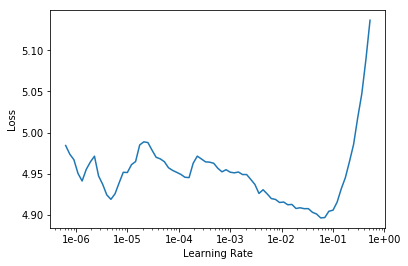

In [40]:
learn.recorder.plot(skip_end=15)

In [41]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.532310,4.403967,0.277573,1:07:47


In [42]:
learn.save('fit_head')

In [ ]:
learn.load('fit_head')

In [43]:
learn.unfreeze()

In [44]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,4.145292,4.096631,0.306282,1:17:16
2,4.132859,4.067226,0.313534,1:17:17
3,4.177394,4.041770,0.315795,1:17:16
4,4.077587,4.012230,0.319351,1:17:15
5,4.031304,3.978342,0.323816,1:17:15
6,3.934728,3.943341,0.327523,1:17:16
7,3.956626,3.910307,0.332015,1:17:17
8,3.884483,3.885286,0.335835,1:17:17
9,3.817356,3.869068,0.337880,1:17:17
10,3.786911,3.865581,0.338105,1:17:18


In [45]:
learn.save('fine_tuned')

In [ ]:
learn.load('fine_tuned');

In [46]:
TEXT = "I greatly enjoyed this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [47]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I greatly enjoyed this movie because i was quite boy in my 50 's when The Er was the first movie i had ever seen . The acting was great and the soundtrack was great . The plot was funny as far
I greatly enjoyed this movie because it was a good piece of work . It had some good scenes and i liked the fact that it made it look like a film about a family living together in the cop 's neighborhood . It


In [48]:
learn.save_encoder('fine_tuned_enc')

# Training Classifier

In [50]:
path = untar_data(URLs.IMDB)

In [51]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [52]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [53]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj the basic premise of "" xxmaj miami xxmaj golem "" most definitely deserves a spot in the top , say , fifty of most demented cinematic plots ever scripted down ! i know top 50 does n't sound too impressive , but i 've seen a lot of really weird films with lunatic plots . i was prepared from something convoluted , because the film was directed and",neg
"xxbos xxmaj it is a great tragedy that both xxmaj richard xxmaj harris and xxmaj john xxmaj derek are no longer with us . xxmaj but that should n't blind anybody to the fact that in 1981 , a pretty ugly blotch appears on both men 's cvs . xxmaj no doubt xxmaj john xxmaj derek conceived this movie doing for his wife what ' xxmaj some xxmaj like it",neg
"xxbos xxmaj if xxmaj saura had n't done anything like this before , xxmaj iberia would be a milestone . xxmaj now it still deserves inclusion to honor a great director and a great cinematic xxunk of xxmaj spanish culture , but he has done a lot like this before , and though we can applaud the riches he has given us , we have to pick and choose favorites",pos
"xxbos xxmaj problem with these type of movies is that literally dozens of them are being made each year . xxmaj luckily for use only a handful are given a theatrical release , while the others are being pushed straight to video or xxup tv , such as this movie . \n \n xxmaj the foremost problem of this movie is really its originality . xxmaj it 's one",neg


In [54]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [55]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


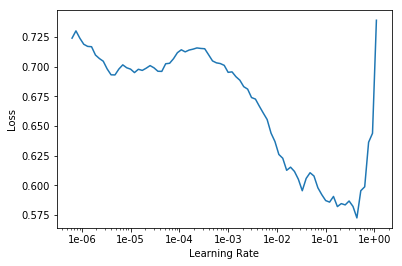

In [56]:
learn.recorder.plot()

In [57]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.370975,0.214644,0.925200,16:43


In [58]:
learn.save('first')

In [ ]:
learn.load('first')

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.326776,0.162503,0.941320,17:07


In [60]:
learn.save('second')

In [ ]:
learn.load('second')

In [61]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.260704,0.167589,0.944560,22:55


In [62]:
learn.save('third')

In [ ]:
learn.load('third')

In [63]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
1,0.250392,0.156807,0.946760,26:44
2,0.250140,0.153094,0.946840,25:34


In [ ]:
learn.save('fourth')

In [ ]:
learn.load('fourth')

# Predictions
### tensor(0) = Negative Review
### tensor(1) = Positive Review
### Confidence interval

In [64]:
learn.predict("I really loved that movie, it was awesome!")

(<fastai.core.Category at 0x7fc78b703e48>,
 tensor(1),
 tensor([6.4310e-11, 1.0000e+00]))

In [65]:
learn.predict("I hated this movie. It was terrible!")

(<fastai.core.Category at 0x7fc78b8e67f0>,
 tensor(0),
 tensor([9.9996e-01, 3.5259e-05]))

In [66]:
learn.predict("It was a really good movie. I hope that they make a sequel eventually. They could have had better actors though.")

(<fastai.core.Category at 0x7fc7b0d89908>, tensor(1), tensor([0.0108, 0.9892]))

In [67]:
learn.predict("This movie is amazing. It is the best.")

(<fastai.core.Category at 0x7fc7cc3f6a20>,
 tensor(1),
 tensor([9.9166e-07, 1.0000e+00]))

In [68]:
learn.predict("This movie is ok.")

(<fastai.core.Category at 0x7fc78bc820f0>, tensor(0), tensor([0.6233, 0.3767]))

In [69]:
learn.predict("This movie was alright. I would have seen another one if it was offered at that time.")

(<fastai.core.Category at 0x7fc78c628208>, tensor(1), tensor([0.4810, 0.5190]))

In [70]:
learn.predict("This was a terrible movie!")

(<fastai.core.Category at 0x7fc78c628908>,
 tensor(0),
 tensor([9.9959e-01, 4.1167e-04]))

In [71]:
learn.predict("Predictable but highly entertaining. The actors were believable and the framing was very artistic")

(<fastai.core.Category at 0x7fc78bcac3c8>,
 tensor(1),
 tensor([2.1447e-07, 1.0000e+00]))

In [72]:
learn.predict("It was really interesting. I really liked the plot twists within the movie. It's a mind bending movie and the end was very happy and it made me cry")

(<fastai.core.Category at 0x7fc78c051b70>,
 tensor(1),
 tensor([2.6945e-05, 9.9997e-01]))

In [73]:
learn.predict("The movie was very slow. It was hard to understand")

(<fastai.core.Category at 0x7fc78bcac908>, tensor(0), tensor([0.9984, 0.0016]))

In [74]:
learn.predict("It was a garbage bogus ass movie.")

(<fastai.core.Category at 0x7fc78bcac7f0>, tensor(0), tensor([0.9933, 0.0067]))

In [75]:
learn.predict("This movie was ok. I thought it could have been better.")

(<fastai.core.Category at 0x7fc78bcacd30>, tensor(0), tensor([0.6211, 0.3789]))

In [77]:
learn.predict("this movie was shit")

(<fastai.core.Category at 0x7fc78bfd20f0>, tensor(0), tensor([0.8745, 0.1255]))

In [117]:
learn.predict("i loved this movie more than i love anything. it was so beautiful and awesome")

(<fastai.core.Category at 0x7fc78bfd2668>,
 tensor(1),
 tensor([3.9535e-13, 1.0000e+00]))

In [118]:
learn.predict("i'm very ambivalent as to whether this movie was good or bad")

(<fastai.core.Category at 0x7fc78bfd0748>, tensor(0), tensor([0.9572, 0.0428]))

In [119]:
learn.predict("what is a movie")

(<fastai.core.Category at 0x7fc78bfd0198>, tensor(0), tensor([0.9653, 0.0347]))

In [120]:
learn.predict("ffffffffffff")

(<fastai.core.Category at 0x7fc78bcc6668>, tensor(1), tensor([0.4857, 0.5143]))

In [121]:
learn.predict("I hated this movie")

(<fastai.core.Category at 0x7fc7890c65c0>, tensor(0), tensor([0.9973, 0.0027]))

In [122]:
learn.predict("I loved this movie")

(<fastai.core.Category at 0x7fc7890c6278>, tensor(1), tensor([0.0024, 0.9976]))

In [123]:
learn.predict("This was a delightful movie. <3")

(<fastai.core.Category at 0x7fc7890c6eb8>,
 tensor(1),
 tensor([4.0048e-05, 9.9996e-01]))

In [124]:
learn.predict("Well I would say this was something that I watch to have an opion")

(<fastai.core.Category at 0x7fc7890c6080>, tensor(1), tensor([0.2173, 0.7827]))

In [125]:
learn.predict("jumamba es python nolo contender")

(<fastai.core.Category at 0x7fc7890c6358>, tensor(0), tensor([0.6191, 0.3809]))

In [126]:
learn.predict("an actual review this time")

(<fastai.core.Category at 0x7fc7890c6588>, tensor(0), tensor([0.8062, 0.1938]))

In [127]:
learn.predict("I'm not sure how I feel about it.")

(<fastai.core.Category at 0x7fc78bfd0dd8>, tensor(0), tensor([0.8737, 0.1263]))

In [128]:
learn.predict("I'm loving this.")

(<fastai.core.Category at 0x7fc78bfd06d8>, tensor(1), tensor([0.0474, 0.9526]))

In [129]:
learn.predict("I learned a lot.")

(<fastai.core.Category at 0x7fc78bfd0cc0>, tensor(1), tensor([0.3667, 0.6333]))

In [130]:
learn.predict("I learned a lot but this could have been better.")

(<fastai.core.Category at 0x7fc78bfc9f60>, tensor(0), tensor([0.8533, 0.1467]))

In [131]:
learn.predict("This was the worst. I hated it big time. I'm going to make sure no one else watches this.")

(<fastai.core.Category at 0x7fc78bfc9a58>,
 tensor(0),
 tensor([9.9969e-01, 3.1450e-04]))

In [147]:
learn.predict("I went to the park and it was very windy and cold")

(<fastai.core.Category at 0x7fc77689aba8>, tensor(0), tensor([0.6168, 0.3832]))

In [156]:
learn.predict("I had a phenomenal time. This was a horrible experience.")

(<fastai.core.Category at 0x7fc77689a5c0>, tensor(0), tensor([0.9831, 0.0169]))

In [152]:
learn.predict("This was a horrible experience. I had a great time.")

(<fastai.core.Category at 0x7fc77689abe0>, tensor(0), tensor([0.9977, 0.0023]))

In [157]:
learn.predict("I liked spices")

(<fastai.core.Category at 0x7fc77689a940>, tensor(1), tensor([0.4644, 0.5356]))

In [158]:
learn.predict("I like the main character's shirt")

(<fastai.core.Category at 0x7fc77689ab70>, tensor(1), tensor([0.1350, 0.8650]))

In [159]:
learn.predict("This movie is kind of ok")

(<fastai.core.Category at 0x7fc77689a7f0>, tensor(0), tensor([0.7388, 0.2612]))

In [160]:
learn.predict("I liked it. It was great.")

(<fastai.core.Category at 0x7fc77689a4e0>,
 tensor(1),
 tensor([1.0253e-10, 1.0000e+00]))

In [161]:
learn.predict("I like it. It was not great.")

(<fastai.core.Category at 0x7fc77689aac8>, tensor(1), tensor([0.0142, 0.9858]))

In [162]:
learn.predict("It was terribly amazing.")

(<fastai.core.Category at 0x7fc77689a550>, tensor(1), tensor([0.1017, 0.8983]))

In [165]:
learn.predict("movie was well defined in its attempt to demonstrate a strong metaphorical context for the growing climate of evil in society")

(<fastai.core.Category at 0x7fc788b70b38>, tensor(1), tensor([0.1951, 0.8049]))

In [166]:
learn.predict("This was overall awful but I came out at the end with fairly good results")

(<fastai.core.Category at 0x7fc788b70eb8>, tensor(0), tensor([0.9685, 0.0315]))